In [14]:
import cv2, numpy as np
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

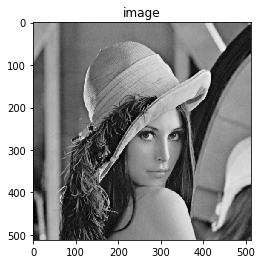

In [3]:
image = cv2.imread('Lena.png',0)
imshow("image", image)

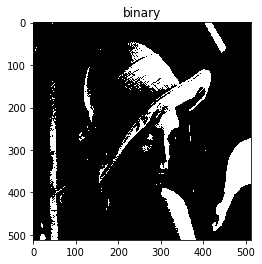

In [4]:
thr, mask = cv2.threshold(image, 
    180, 255, cv2.THRESH_BINARY)
imshow("binary", mask)

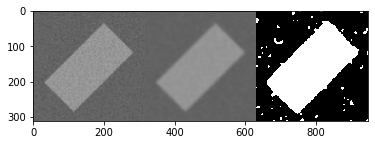

In [4]:
image = cv2.imread("boxnoise.png", 0)
img_blur = cv2.GaussianBlur(image, (21, 21), 0)
_, binary = cv2.threshold(img_blur, 100, 255, cv2.THRESH_BINARY)
imshow("", np.hstack([image, img_blur, binary]))

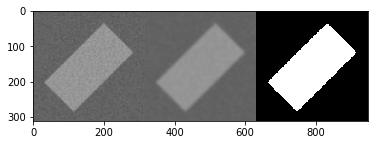

In [5]:
_, binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY
                         + cv2.THRESH_OTSU) #binary에 추가 알고리즘(find threshold)
imshow("", np.hstack([image, img_blur, binary]))

''

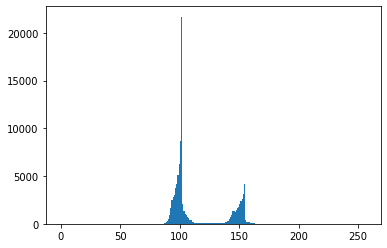

In [7]:
plt.hist(image.ravel(), 256, [0, 256])
""""""

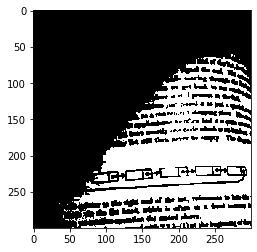

In [12]:
image = cv2.imread("text.jpg", 0)
img_blur = cv2.GaussianBlur(image, (3, 3), 0)
_, binary = cv2.threshold(img_blur, 128, 255, cv2.THRESH_BINARY)
imshow("", binary)

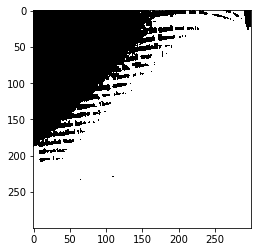

In [13]:
image = cv2.imread("text.jpg", 0)
img_blur = cv2.GaussianBlur(image, (3, 3), 0)
_, binary = cv2.threshold(img_blur, 60, 255, cv2.THRESH_BINARY)
imshow("", binary) #OTSU 알고리즘으로 풀지 못함

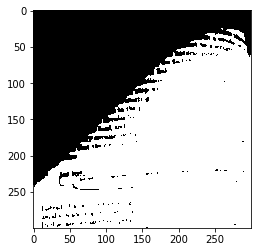

In [27]:
image = cv2.imread("text.jpg", 0)
img_blur = cv2.GaussianBlur(image, (3, 3), 0)
_, binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY
                         + cv2.THRESH_OTSU)
imshow("", binary)

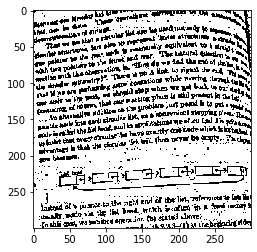

In [33]:
image = cv2.imread("text.jpg", 0)
binary = cv2.adaptiveThreshold(image, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 21, 2)
imshow("", binary)

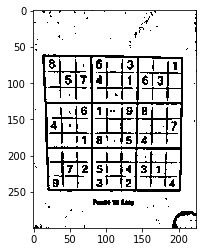

In [35]:
image = cv2.imread("grid.jpg", 0)
img_blur = cv2.GaussianBlur(image, (3, 3), 0)
binary = cv2.adaptiveThreshold(img_blur, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 21, 2)
imshow("", binary)

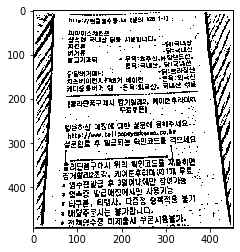

In [37]:
image = cv2.imread("recipt.jpg", 0)
img_blur = cv2.GaussianBlur(image, (3, 3), 0)
binary = cv2.adaptiveThreshold(img_blur, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 21, 2)
imshow("", binary)

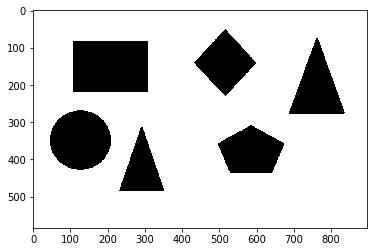

In [39]:
img = cv2.imread("shape3.png", 0)
thr, mask = cv2.threshold(img, 0, 255, 
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("", mask)

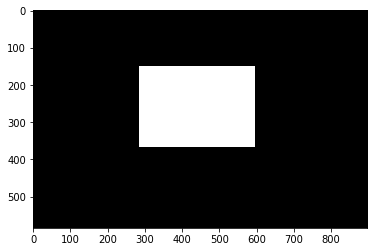

[array([[[285, 149]],

       [[285, 367]],

       [[593, 367]],

       [[593, 149]]], dtype=int32)]


In [44]:
test_img = cv2.imread("shape4.png", 0)
thr, mask_2 = cv2.threshold(test_img, 0, 255, 
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("", mask_2)
plt.show()

contours, _ =cv2.findContours(mask_2, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)
#외곽선을 나타낼 수 있는 모서리의 좌표값을 찾아줌
print(contours) 

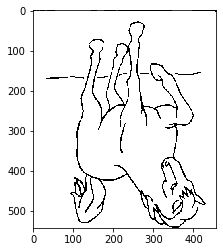

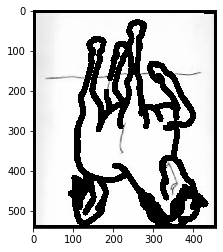

In [51]:
test_img = cv2.imread("horse.png", 0)
thr, mask_2 = cv2.threshold(test_img, 0, 255, 
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("", mask_2)
plt.show()

contours, _ = cv2.findContours(mask_2, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)

test_img2 = cv2.imread("horse.png", 0)
cv2.drawContours(test_img2, contours, -1, (0, 0, 255), 10)

imshow('', test_img2)

6
shape = 240  length = 513.7056245803833   approx=3
shape = 300  length = 515.9310202598572   approx=5
shape = 226  length = 531.8721435070038   approx=8
shape = 4  length = 672.0   approx=4
shape = 298  length = 616.7178171873093   approx=3
shape = 56  length = 493.0336227416992   approx=4


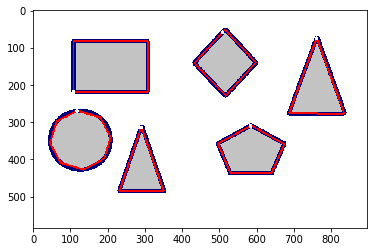

In [88]:
test_img = cv2.imread("shape3.png")
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(test_gray, 0, 255, 
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

for con in contours:
    peri = cv2.arcLength(con,  True)
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    
    print(f"shape = {len(con)}  length = {peri}   approx={len(approx)}")
    p = tuple(con[1][0])
    cv2.drawContours(test_img, [con], -1, (125, 0, 0), 10)
    cv2.drawContours(test_img, [approx], -1, (0, 0, 255), 3)
    cv2.circle(test_img, p, 5, (255, 255, 255), -1)

imshow('', test_img)

6
shape = 240  length = 513.7056245803833   approx=3
shape = 300  length = 515.9310202598572   approx=5
shape = 226  length = 531.8721435070038   approx=8
shape = 4  length = 672.0   approx=4
shape = 298  length = 616.7178171873093   approx=3
shape = 56  length = 493.0336227416992   approx=4


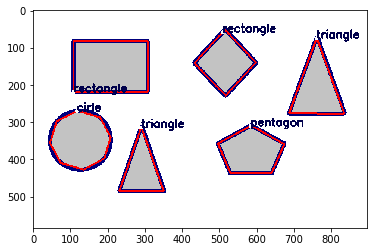

In [105]:
test_img = cv2.imread("shape3.png")
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(test_gray, 0, 255, 
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

for con in contours:
    peri = cv2.arcLength(con,  True)
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    
    print(f"shape = {len(con)}  length = {peri}   approx={len(approx)}")
    
    p = tuple(con[1][0])

    cv2.drawContours(test_img, [con], -1, (125, 0, 0), 10)
    cv2.drawContours(test_img, [approx], -1, (0, 0, 255), 3)
    cv2.circle(test_img, p, 5, (255, 255, 255), -1)
    
    if len(approx) >= 8:
        cv2.putText(test_img, "cirle", p,
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (75, 0, 0), 3)
    elif len(approx) == 5:
        cv2.putText(test_img, "pentagon", p,
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (75, 0, 0), 3)
    
    elif len(approx) == 4:
        cv2.putText(test_img, "rectangle", p,
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (75, 0, 0), 3)
    elif len(approx) == 3:
        cv2.putText(test_img, "triangle", p,
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (75, 0, 0), 3)
            

imshow('', test_img)

4
shape = 213  length = 492.1980459690094   approx=19
shape = 264  length = 617.3279899358749   approx=24
shape = 229  length = 568.6833263635635   approx=18
shape = 215  length = 413.47012400627136   approx=4


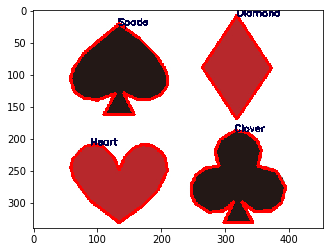

In [120]:
test_img = cv2.imread("trump.png")
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(test_gray, 0, 255, 
                         cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask = 255 - mask

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

for con in contours:
    peri = cv2.arcLength(con,  True)
    approx = cv2.approxPolyDP(con, 0.005*peri, True)
    
    print(f"shape = {len(con)}  length = {peri}   approx={len(approx)}")
    p = tuple(con[1][0])
    cv2.drawContours(test_img, [approx], -1, (0, 0, 255), 3)
    if len(approx) == 4:
        cv2.putText(test_img, "Diamond", p,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (75, 0, 0), 2)
    if len(approx) == 18:
        cv2.putText(test_img, "Spade", p,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (75, 0, 0), 2)
    if len(approx) == 19:
        cv2.putText(test_img, "Heart", p,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (75, 0, 0), 2)
    if len(approx) > 19:
        cv2.putText(test_img, "Clover", p,
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (75, 0, 0), 2)

imshow('', test_img)

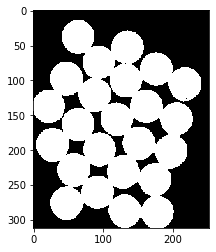

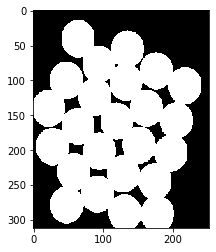

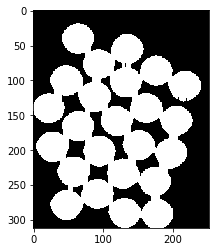

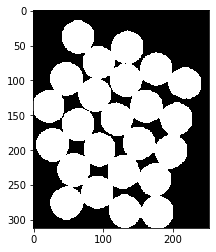

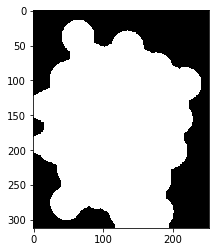

In [142]:
test_img = cv2.imread("water_coins.jpg")
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(test_gray, 127, 255, cv2.THRESH_BINARY)
binary = 255 - binary
imshow('', binary) #붙어있는 형태에 대한 처리 - 침식연산자 사용, 연결관계 제거

#팽창
dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (5, 5), iterations=5)
imshow('', dilated)         

#침식
eroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (5, 5), iterations=5)
imshow('', eroded)

#침식 후 챙창
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, cv2.getStructuringElement
                          (cv2.MORPH_ELLIPSE, (5, 5)), iterations=5)
imshow('', opened)

#팽창 후 침식
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, cv2.getStructuringElement
                          (cv2.MORPH_ELLIPSE, (5, 5)), iterations=5)
imshow('', closed)

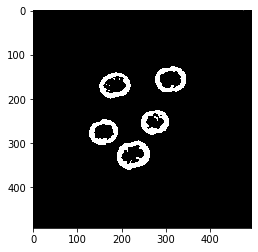

In [149]:
test_img = cv2.imread("coin.png")
roi = test_img.copy()
test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_g_blur = cv2.GaussianBlur(test_gray, (7, 7), 0)
binary = cv2.adaptiveThreshold(test_g_blur, 255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 45, 6)
imshow('', binary)

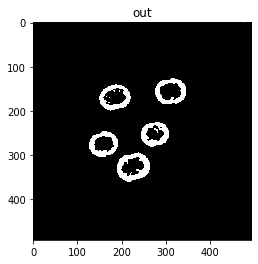

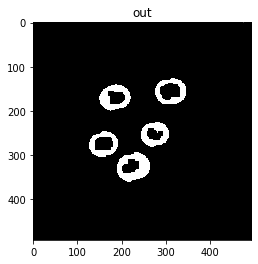

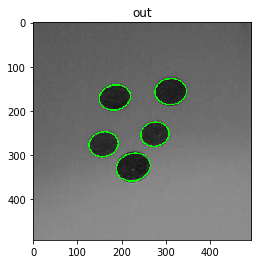

In [154]:
kernel = np.ones((3, 3), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=5)

cont_img = closed.copy()
contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0, 255, 0), 2)

imshow("out", binary)
imshow("out", cont_img)
imshow("out", roi)

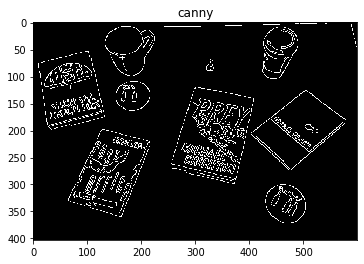

In [12]:
img = cv2.imread('book.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)
imshow("canny", edged) #외곽선 정보 검출

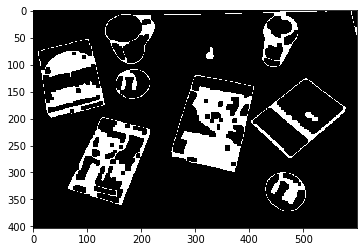

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
imshow("", closed)

I found 4 books in that image


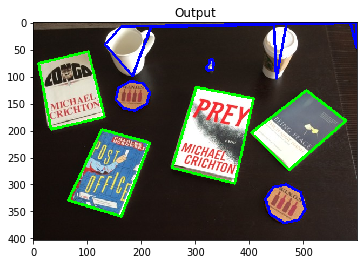

In [13]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(img, [approx], -1, (0, 255, 0), 4)
        total += 1
    else:
        cv2.drawContours(img, [approx], -1, (255, 0, 0), 4)
        
print("I found {0} books in that image".format(total))
imshow("Output", img)

In [15]:
def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

In [16]:
img = cv2.imread('stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[[[296 258  28]
  [360 338  29]
  [302 138  28]
  [356 272  29]
  [240 274  29]
  [176 262  28]
  [256 330  29]
  [176 132  28]
  [426 272  28]
  [240 136  29]
  [308  78  28]
  [264 388  29]
  [242 200  28]
  [180 204  28]
  [ 84 132  27]
  [324 382  29]
  [368 148  28]
  [250  70  29]]]
[(255, 3119), (0, 17)]
[(0, 2464), (255, 900)]
[(255, 3113), (0, 23)]
[(255, 3358), (0, 6)]
[(255, 3138), (0, 226)]
[(255, 2945), (0, 191)]
[(255, 3140), (0, 224)]
[(0, 2646), (255, 490)]
[(0, 2393), (255, 743)]
[(255, 3234), (0, 130)]
[(0, 2621), (255, 515)]
[(0, 2726), (255, 638)]
[(0, 2606), (255, 530)]
[(0, 2697), (255, 439)]
[(255, 2859), (0, 57)]
[(255, 3159), (0, 205)]
[(0, 2447), (255, 689)]
[(0, 2717), (255, 647)]


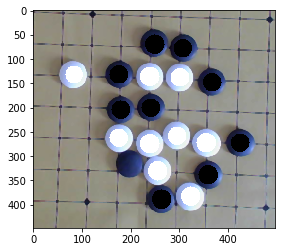

In [17]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)

circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)